In [7]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import lightning as L

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from FromScratch import WordEmbeddingFromScratch

In [2]:
inputs = torch.tensor(
    [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], dtype=torch.float32
)
labels = torch.tensor(
    [[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0]], dtype=torch.float32
)

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [3]:
modelFromScratch = WordEmbeddingFromScratch()

Before optimization, parameters are


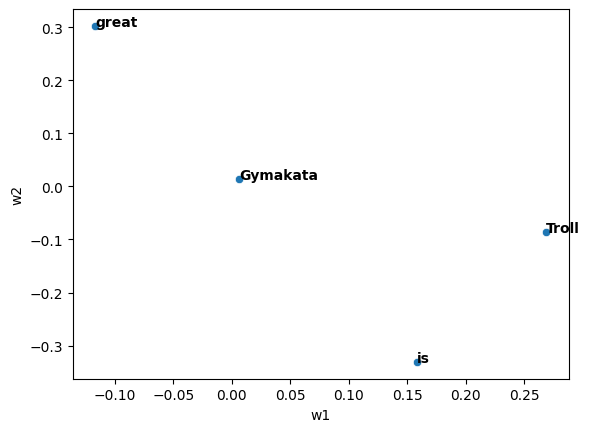

In [4]:
print("Before optimization, parameters are")
data = {
    "w1": [
        modelFromScratch.input1_w1.item(),
        modelFromScratch.input2_w1.item(),
        modelFromScratch.input3_w1.item(),
        modelFromScratch.input4_w1.item(),
    ],
    "w2": [
        modelFromScratch.input1_w2.item(),
        modelFromScratch.input2_w2.item(),
        modelFromScratch.input3_w2.item(),
        modelFromScratch.input4_w2.item(),
    ],
    "token": ["Troll", "is", "great", "Gymakata"],
    "output": ["input1", "input2", "input3", "input4"],
}
df = pd.DataFrame(data)
sns.scatterplot(x="w1", y="w2", data=df)
for line in range(0, df.shape[0]):
    plt.text(
        df.w1[line],
        df.w2[line],
        df.token[line],
        horizontalalignment="left",
        size="medium",
        color="black",
        weight="semibold",
    )
plt.show()

In [5]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(modelFromScratch, train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/joacopolo/Documents/venvs/torch-venv/lib/python3.8/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | CrossEntropyLoss | 0     
  | other params | n/a              | 16    
--------------------------------------------------
16        Tra

Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 168.64it/s, v_num=2]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 133.56it/s, v_num=2]


After optimization, parameters are


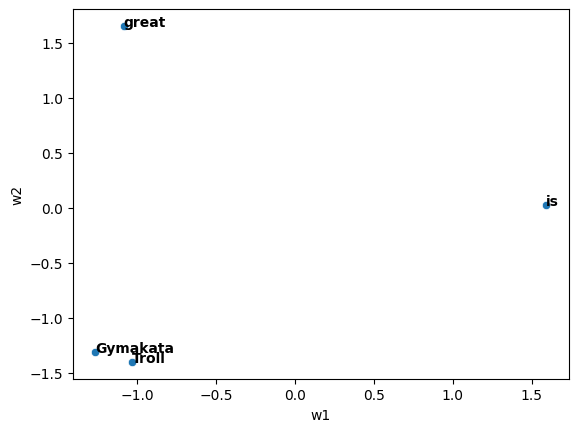

In [6]:
print("After optimization, parameters are")
data = {
    "w1": [
        modelFromScratch.input1_w1.item(),
        modelFromScratch.input2_w1.item(),
        modelFromScratch.input3_w1.item(),
        modelFromScratch.input4_w1.item(),
    ],
    "w2": [
        modelFromScratch.input1_w2.item(),
        modelFromScratch.input2_w2.item(),
        modelFromScratch.input3_w2.item(),
        modelFromScratch.input4_w2.item(),
    ],
    "token": ["Troll", "is", "great", "Gymakata"],
    "output": ["input1", "input2", "input3", "input4"],
}
df = pd.DataFrame(data)
sns.scatterplot(x="w1", y="w2", data=df)
for line in range(0, df.shape[0]):
    plt.text(
        df.w1[line],
        df.w2[line],
        df.token[line],
        horizontalalignment="left",
        size="medium",
        color="black",
        weight="semibold",
    )
plt.show()

In [9]:
softmax = nn.Softmax(dim=0)
print(
    torch.round(
        softmax(modelFromScratch(torch.tensor([[1, 0, 0, 0]], dtype=torch.float32))),
        decimals=2,
    )
)

tensor([0.0100, 0.9900, 0.0000, 0.0000], grad_fn=<RoundBackward1>)
